<a href="https://colab.research.google.com/github/maliksalman55/models/blob/main/FFinalResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

src_path = '/content/drive/MyDrive/kaggle.json'
dest_directory = '/root/.kaggle/'

# Create the destination directory if it doesn't exist
os.makedirs(dest_directory, exist_ok=True)

# Copy the Kaggle JSON file to the destination
shutil.copy(src_path, dest_directory)
#rum this for kaggle link
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d markdaniellampa/fish-dataset
# unzip download file
import zipfile
zip_ref = zipfile.ZipFile ('/content/fish-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

cp: cannot stat 'kaggle.json': No such file or directory
 99% 1.57G/1.58G [00:16<00:00, 130MB/s]
100% 1.58G/1.58G [00:16<00:00, 104MB/s]


In [ ]:
import os
import shutil

src_path = '/content/drive/MyDrive/kaggle.json'
dest_directory = '/root/.kaggle/'

# Create the destination directory if it doesn't exist
os.makedirs(dest_directory, exist_ok=True)

# Copy the Kaggle JSON file to the destination
shutil.copy(src_path, dest_directory)
#rum this for kaggle link
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d markdaniellampa/fish-dataset
# unzip download file
import zipfile
zip_ref = zipfile.ZipFile ('/content/fish-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

cp: cannot stat 'kaggle.json': No such file or directory
fish-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content//FishImgDataset/train', # I pass and use train dataset path.
    labels="inferred", # because we hv labels dataset.
    label_mode="categorical",   # we use categorical became we hv more then 2 classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None, # if we need to rotate image then put seed value.
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8809 files belonging to 31 classes.


In [ ]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/FishImgDataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2751 files belonging to 31 classes.


In [ ]:
# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()

# Add the ResNet50 base model
model.add(base_model)

# Add Global Average Pooling layer
model.add(GlobalAveragePooling2D())

# Add a fully connected layer with batch normalization and dropout
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add the output layer (adjust the number of units for your dataset)
model.add(Dense(31, activation='softmax'))


In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=32)


Epoch 1/32
276/276 [==============================] - 164s 392ms/step - loss: 3.1324 - accuracy: 0.2578 - val_loss: 3.5363 - val_accuracy: 0.1196
Epoch 2/32
276/276 [==============================] - 104s 370ms/step - loss: 2.4215 - accuracy: 0.3823 - val_loss: 4.6595 - val_accuracy: 0.2119
Epoch 3/32
276/276 [==============================] - 110s 398ms/step - loss: 1.8071 - accuracy: 0.4969 - val_loss: 1.3212 - val_accuracy: 0.6071
Epoch 4/32
276/276 [==============================] - 101s 362ms/step - loss: 1.1761 - accuracy: 0.6519 - val_loss: 1.0438 - val_accuracy: 0.7034
Epoch 5/32
276/276 [==============================] - 100s 361ms/step - loss: 0.8555 - accuracy: 0.7389 - val_loss: 1.0221 - val_accuracy: 0.6903
Epoch 6/32
276/276 [==============================] - 109s 391ms/step - loss: 0.6079 - accuracy: 0.8110 - val_loss: 3.7405 - val_accuracy: 0.3919
Epoch 7/32
276/276 [==============================] - 100s 362ms/step - loss: 0.4171 - accuracy: 0.8692 - val_loss: 1.0761 -

In [ ]:
training_history.history #Return Dictionary of history

{'loss': [3.13244891166687,
  2.421485185623169,
  1.8071115016937256,
  1.1760656833648682,
  0.855482280254364,
  0.6079088449478149,
  0.4170740842819214,
  0.32958677411079407,
  0.23827725648880005,
  0.20924529433250427,
  0.19653861224651337,
  0.15960295498371124,
  0.15057030320167542,
  0.13071604073047638,
  0.18301762640476227,
  0.11842843145132065,
  0.1065400168299675,
  0.09818930178880692,
  0.1106674000620842,
  0.09733224660158157,
  0.11902699619531631,
  0.09164632856845856,
  0.06522446125745773,
  0.048784829676151276,
  0.072935551404953,
  0.07252534478902817,
  0.12271374464035034,
  0.07157858461141586,
  0.09341185539960861,
  0.06764629483222961,
  0.04826454818248749,
  0.04446147009730339],
 'accuracy': [0.2578045129776001,
  0.38233625888824463,
  0.4968782067298889,
  0.6519469022750854,
  0.7389034032821655,
  0.8109887838363647,
  0.8692246675491333,
  0.9033942818641663,
  0.9242819547653198,
  0.9302985668182373,
  0.9382449984550476,
  0.9509592652

In [ ]:

#recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
#Calculating Accuracy of Model Achieved on Validation set
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100)) # (-1) show use final Accuracy

Validation set Accuracy: 77.71719098091125 %


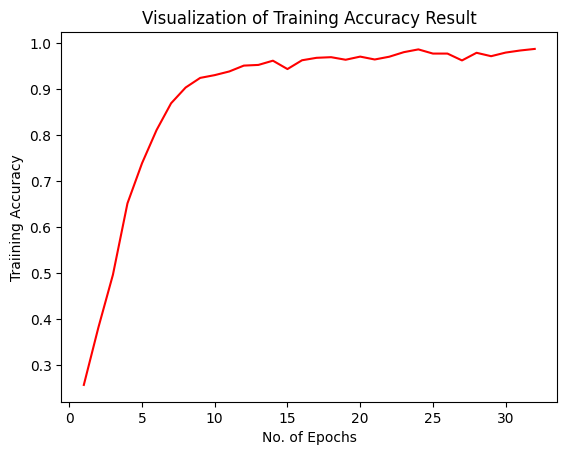

In [ ]:
#Acuracy Visualization Training Visualization
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

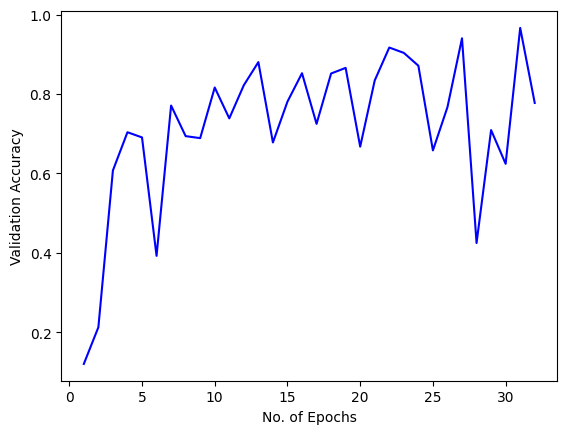

In [ ]:
#Validation Accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')


#visualization of Validation Accuracy Result')
plt.show()


In [ ]:
# Evaluating Model
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

276/276 [==============================] - 44s 158ms/step - loss: 0.8558 - accuracy: 0.8012
Training accuracy: 0.801226019859314


In [ ]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

86/86 [==============================] - 14s 143ms/step - loss: 0.9957 - accuracy: 0.7772
Validation accuracy: 0.7771719098091125


In [ ]:
model.save('/content/drive/MyDrive/finalresnet50_model.keras')

In [ ]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/finalresnet50_model.keras')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved model
saved_model_path = '/content/drive/MyDrive/finalresnet50_model.keras'  # Specify the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and collect true and predicted labels
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Extract true labels
    predictions = loaded_model.predict(images)  # Predict labels
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# You can also print a classification report for additional metrics
report = classification_report(true_labels, predicted_labels, target_names=validation_set.class_names)
print("Classification Report:")
print(report)

1/1 [==============================] - 1s 1s/step
Confusion Matrix:
[[ 19   0   0   1   0   0   1   0   0   0   0   1   0   0   4   0   0   0
    7   2   0   0   0   0   0   2   0   0   0  15   0]
 [  0  32   0   8   0   0   0   0   0   0   0   8   0   0   0   0   4   0
    1   2   3   0   0   0   0   1   0   0   0   4   0]
 [  0   0  57   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    3   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  91   0   0   2   0   0   0   0   3   0   0   0   0   1   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  36   0   0   0   2   0   1   0   0   0   0   0   0   0
    5   0   1   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   1   0  10   1   0   0   0   0   4   0   1   2   0   2   0
   26   5   0   0   0   0   0   1   0   0   0   7   0]
 [  0   0   0   2   0   0  60   0   0   0   0   1   0   0   0   0   1   0
   20   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   1   0   0   1

1/1 [==============================] - 1s 1s/step


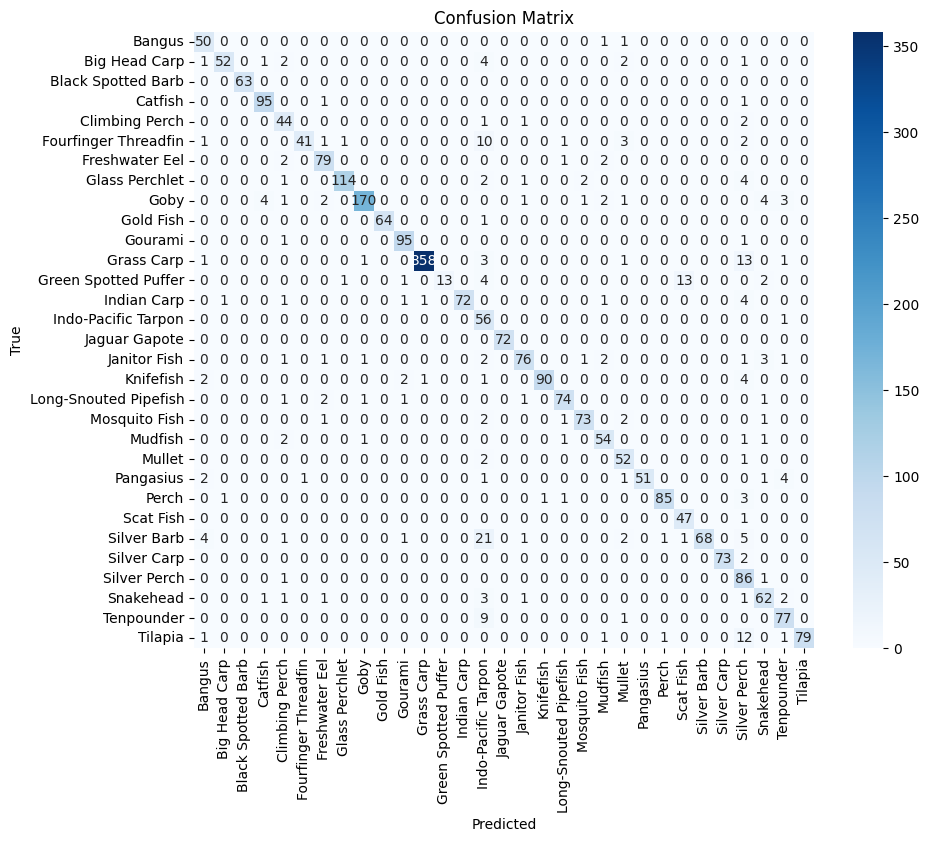

Classification Report:
                       precision    recall  f1-score   support

               Bangus       0.81      0.96      0.88        52
        Big Head Carp       0.96      0.83      0.89        63
   Black Spotted Barb       1.00      1.00      1.00        63
              Catfish       0.94      0.98      0.96        97
       Climbing Perch       0.75      0.92      0.82        48
 Fourfinger Threadfin       0.98      0.68      0.80        60
       Freshwater Eel       0.90      0.94      0.92        84
       Glass Perchlet       0.98      0.92      0.95       124
                 Goby       0.98      0.90      0.94       189
            Gold Fish       1.00      0.98      0.99        65
              Gourami       0.94      0.98      0.96        97
           Grass Carp       0.99      0.95      0.97       378
 Green Spotted Puffer       1.00      0.38      0.55        34
          Indian Carp       1.00      0.89      0.94        81
  Indo-Pacific Tarpon       0.4

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Load the saved model
saved_model_path = '/content/drive/MyDrive/finalresnet50_model.keras'  # Specify the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and collect true and predicted labels
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Extract true labels
    predictions = loaded_model.predict(images)  # Predict labels
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=validation_set.class_names, yticklabels=validation_set.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# You can also print a classification report for additional metrics
report = classification_report(true_labels, predicted_labels, target_names=validation_set.class_names)
print("Classification Report:")
print(report)